# HEALTHCARE SYSTEMS

### Business Understanding
Am hired by a Non-governmental organisation to;
1. Develop a model to predict billing amount based on the patient's medical condition, hospital and treatment details.
2. group patients based on age, medical conditions and treatment received to identify patterns in health care needs.
3. Identify the key factors driving healthcare costs, such as medical condition, type of admission or hospital choice.
4. Investigate how different insuarance providers correlate with medical conditions, billings and outcomes.

## Data Collection


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
#check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [3]:
# Convert 2 dates columns to datetime type:
daytime_columns = ['Date of Admission','Discharge Date']
for x in daytime_columns:
    df[x] = pd.to_datetime(df[x])

In [4]:
#convert the Name to capital case
df.Name = df.Name.str.title()

In [5]:
num_of_diseases = df['Medical Condition'].nunique()
num_of_diseases

6

In [6]:
# check for duplicates
duplicates = df.duplicated().sum()
duplicates

534

### Visualisation

#### Billing amount

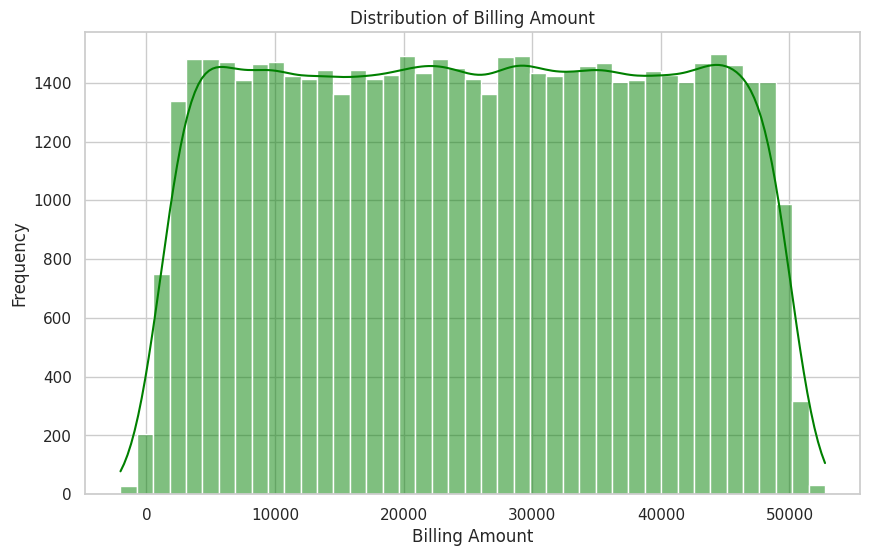

In [7]:
# Plot a histogram to understand the distribution of billing amounts
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], kde=True, color='green')
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

** observation:** Itis evenly distributed. As the billing approaches 50,000, theres a noticeable decrease in frequency, indicating fewer instance of hiher billing amounts.

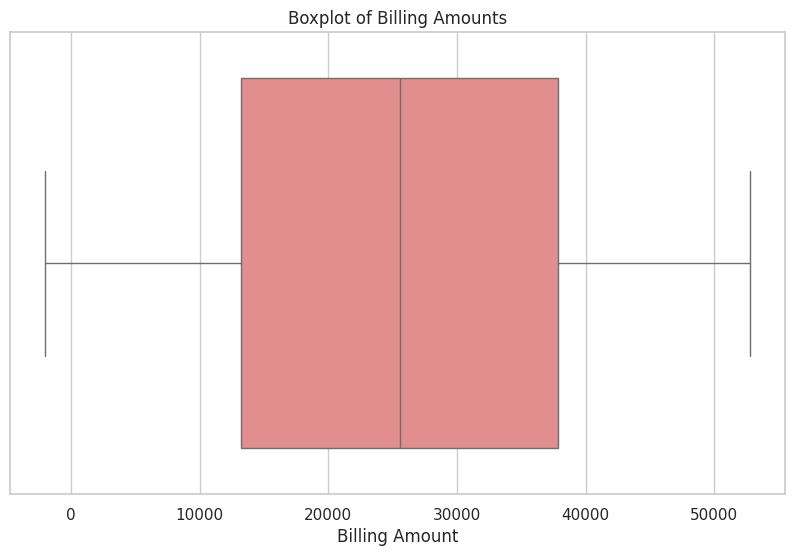

In [8]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Billing Amount'], color='lightcoral')
plt.title('Boxplot of Billing Amounts')
plt.xlabel('Billing Amount')
plt.show()

1. there's no outliers. All billing amounts fall within the expected range of variability.
2. The median appearsto be centered, suggesting a relatively symmetric distribution

#### Patient Demographics


Text(0, 0.5, 'Frequency')

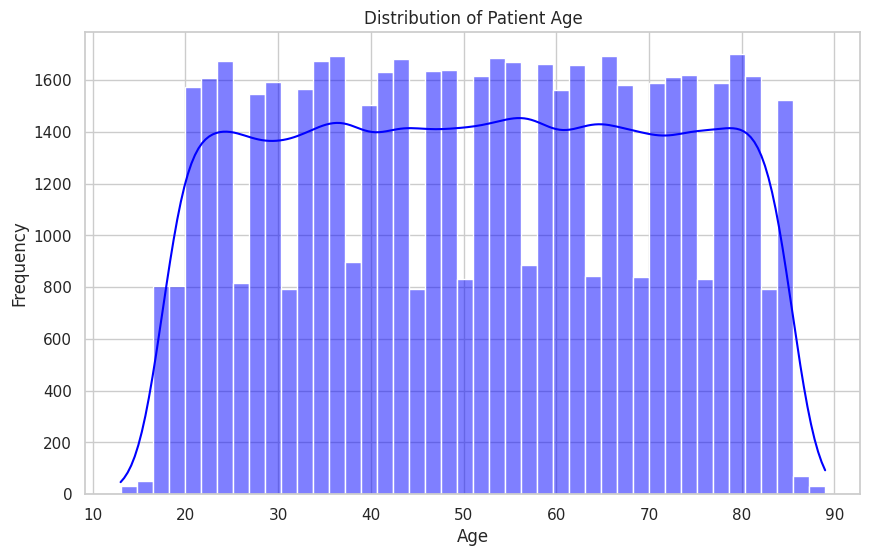

In [9]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Spread: The histogramshows a wide range of ages, indicating that patients of all ages are represented but with varying frequencies.

Distribution Shape: The line graph suggests a smoothed distribution of ages, showing how the frequency of patients changes across different age groups.

<ipython-input-10-68abccb9cb61>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='pastel')


Text(0, 0.5, 'Frequency')

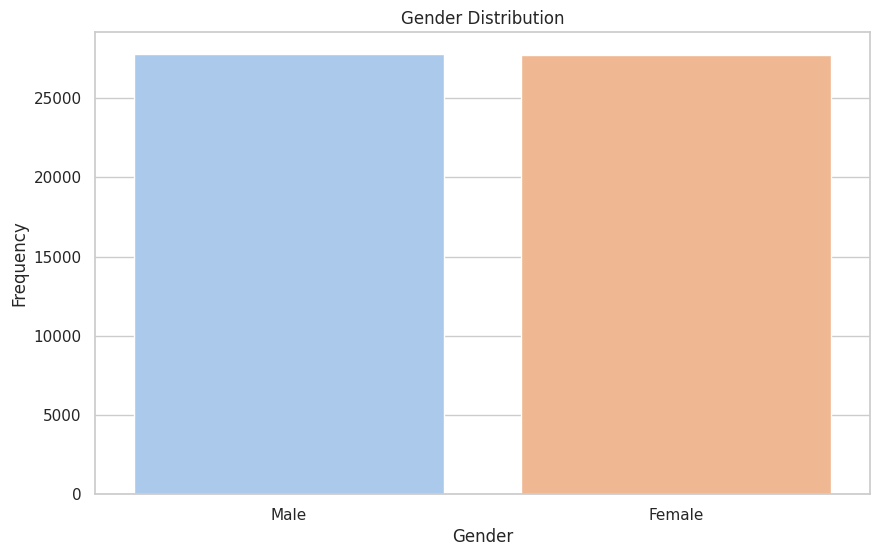

In [10]:
# gender distribution

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gender'], palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

that is an even distribution of gender between male and female patients.

<ipython-input-11-51682eb17c79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medical Condition', data=df,


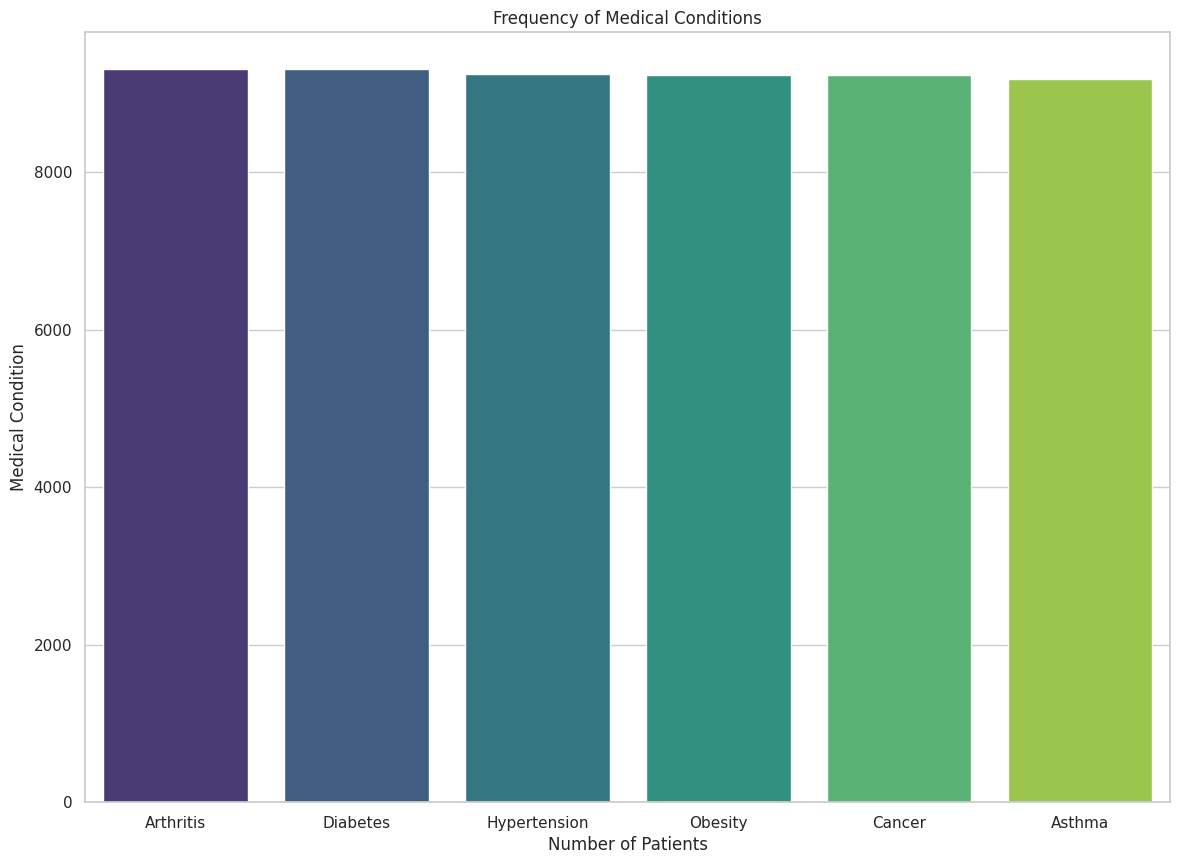

In [11]:
# Medical Condition Frequency (Show all conditions)
plt.figure(figsize=(14, 10))  # Increase figure size
sns.countplot(x='Medical Condition', data=df,
              order=df['Medical Condition'].value_counts(10).index,
              palette='viridis')

# Add titles and labels
plt.title('Frequency of Medical Conditions')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Condition')

# Rotate y-axis labels for better readability (if needed)
plt.yticks(rotation=0)

# Display the plot
plt.show()


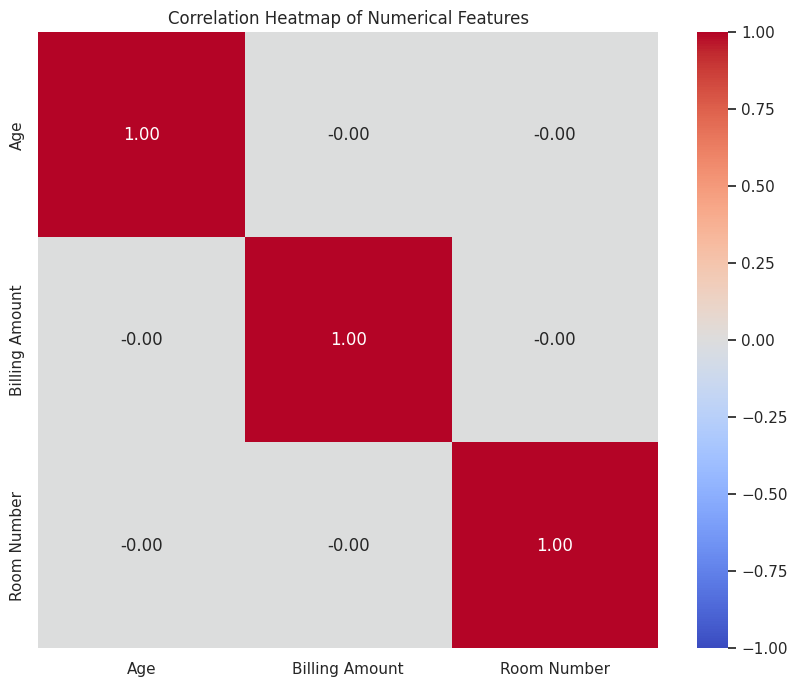

In [12]:
# let's look for correlation
# Select numerical columns
numerical_data = df[['Age', 'Billing Amount', 'Room Number']]  # Add more numerical columns if available

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the visual style
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



Age, Billing Amount, and Room Number do not have any significant linear relationships with each other, as indicated by the -0.00 correlations.
This suggests that changes in one variable do not predict changes in the other variables.

<ipython-input-13-c88648a19189>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Insurance Provider', data=df,


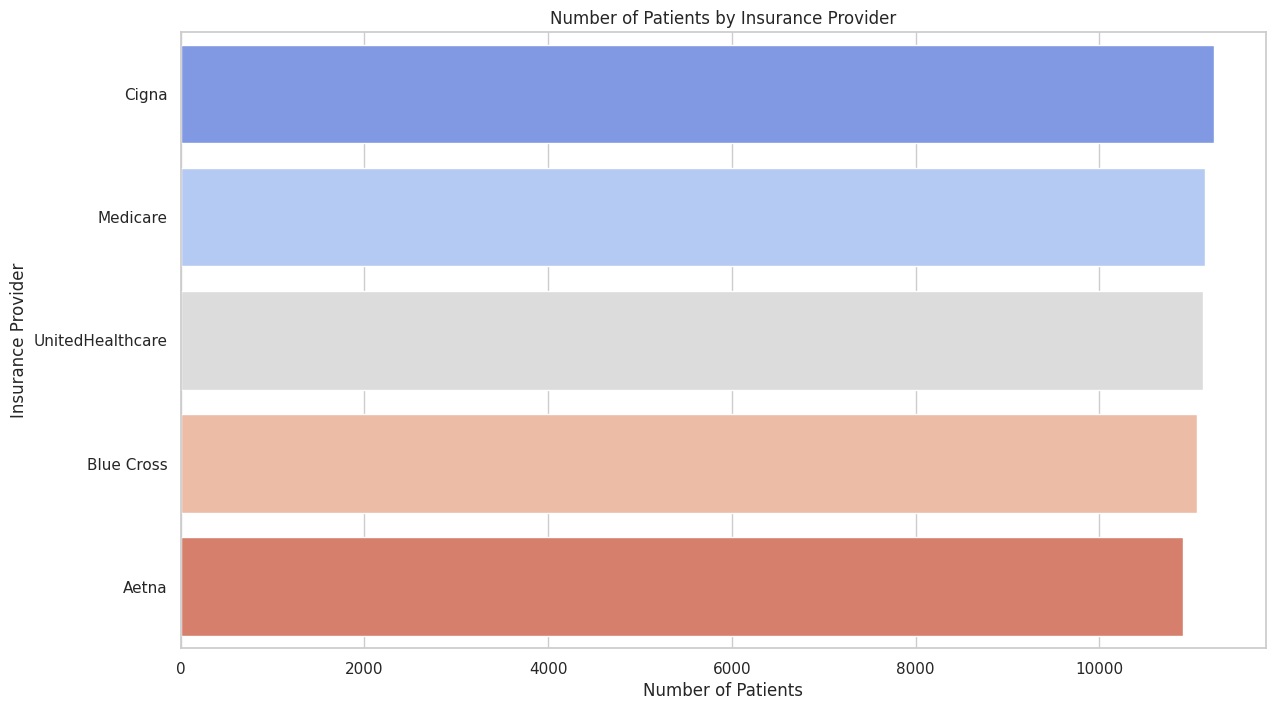

<ipython-input-13-c88648a19189>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Billing Amount', y='Insurance Provider', data=df, palette='coolwarm')


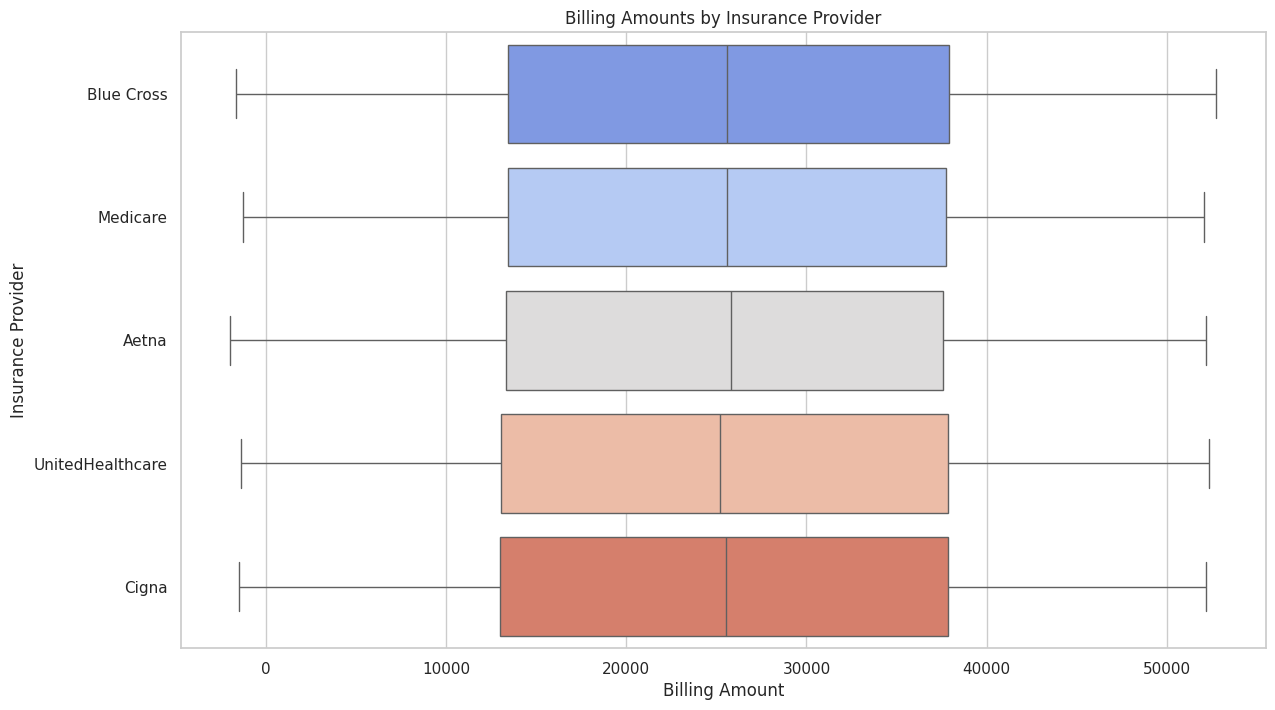

In [13]:
# Set up the visual style
sns.set(style="whitegrid")

# 4.1. Bar Chart of Insurance Providers
plt.figure(figsize=(14, 8))
sns.countplot(y='Insurance Provider', data=df,
              order=df['Insurance Provider'].value_counts().index,
              palette='coolwarm')
plt.title('Number of Patients by Insurance Provider')
plt.xlabel('Number of Patients')
plt.ylabel('Insurance Provider')
plt.show()

# 4.2. Boxplot of Billing Amounts by Insurance Provider
plt.figure(figsize=(14, 8))
sns.boxplot(x='Billing Amount', y='Insurance Provider', data=df, palette='coolwarm')
plt.title('Billing Amounts by Insurance Provider')
plt.xlabel('Billing Amount')
plt.ylabel('Insurance Provider')
plt.show()


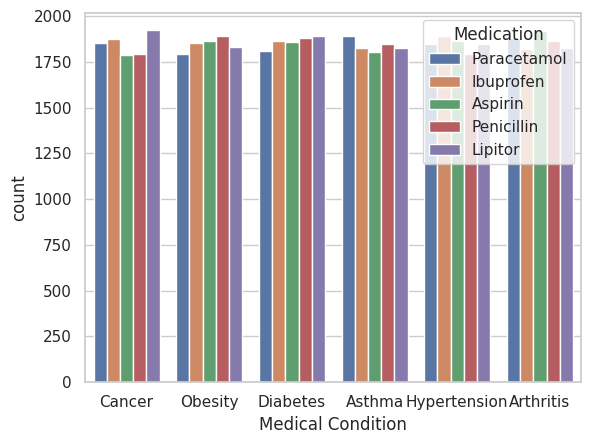

In [14]:
# medication for each medical condition
sns.countplot(x='Medical Condition', hue='Medication', data=df)
plt.show()

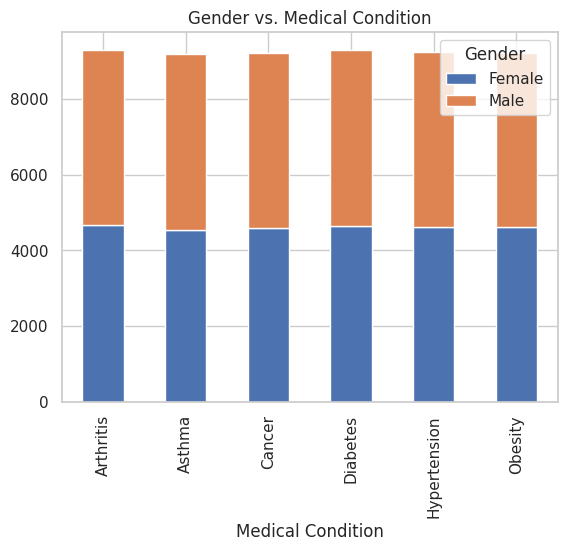

In [15]:
#Gender vs Medical condition
df.groupby(['Medical Condition', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Gender vs. Medical Condition')
plt.show()

### Modelling

#### 1. Predicting billing amount with patients details

In [16]:
# Select relevant columns
columns_to_use = ['Medical Condition', 'Hospital', 'Admission Type', 'Medication', 'Insurance Provider', 'Billing Amount']
data = df[columns_to_use]

In [17]:
# Encode categorical variables
categorical_columns = ['Medical Condition', 'Hospital', 'Admission Type', 'Medication', 'Insurance Provider']
data = pd.get_dummies(data, columns=categorical_columns)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = data.drop('Billing Amount', axis=1)
y = data['Billing Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

NameError: name 'data' is not defined